### a,b,c) Defining MCMC Algorithm 

Explanation: MonteCarlo method is a simulation strategy. We typically repeat an experiment multiple times by drawing values for our parameters ( in this case lambda1, lambda2 and Ws) from a distribution. The distribution of the tweets itself follows Poisson distribution since the occurance of each tweet is random and independent of another tweet. While the distribution of the parameters follows a normal distribution which means there is a very high probability of a certain number to be the value of lambda. And the value of the parameters increases(+ve std) or decreases(-ve std) with reducing probability.

Markov Chain is the process of creating a dependency on the value we draw from the probability distribution upon previously drawn (immediately preceeding) value of the parameter. 

Below is the implementation (Using the implementation from Nima)

In [8]:
def MCMC(log_Posterior,data,initial,step_cov,n_iteration):
    param1=np.array(initial)
    sample=np.array(initial)
    for j in range(n_iteration):
        log_Posterior_i=log_Posterior(data,param1)
        #update the location
        param2=np.random.multivariate_normal(param1,step_cov)
        #find new posterior
        log_Posterior_f=log_Posterior(data,param2)
        # generate a random number between 0 and 1
        rand=np.random.rand()
        if log_Posterior_f-log_Posterior_i>np.log(rand):
            sample=np.vstack((sample,param2))
            param1=param2[:]
        else:
            sample=np.vstack((sample,param1))
    return(sample)

In [10]:
import pandas as pd
data=pd.read_csv('tweet_counts.csv')

In [11]:
k=data['count'].values
w=data['week'].values

In [12]:
Poisson=lambda k,λ : (λ**k)/np.math.factorial(k)*np.exp(-λ)
α=1/np.mean(k)

In [13]:
def log_posterior(data,param):
    k,w=data
    lamb1,lamb2,W_s=param
    
    P=0
    
    for i in k[w<W_s]:
        P=P+np.log(Poisson(i,lamb1)*α*np.exp(-α*lamb1))

    for j in k[w>=W_s]:
        P=P+np.log(Poisson(j,lamb2)*α*np.exp(-α*lamb2))
        
    return(P)

In [14]:
D=MCMC(log_posterior,data=[k,w],initial=[20,20,20],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=10000)

In [15]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize']=8,6

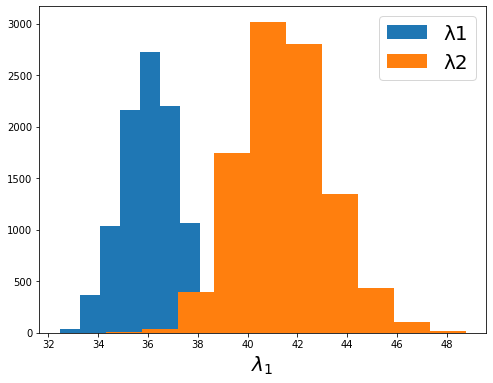

In [16]:
plt.hist(D.T[0][100:],label='λ1')
plt.hist(D.T[1][100:],label='λ2')
plt.xlabel("$\lambda_1$",fontsize=20)
plt.legend(fontsize=20)
plt.show()

###) Initial values do not affect the final result if we have a lot of iterations. Eventually it will converge to the same absolute value where the function converges. If we have a lot of variance in our initial value or we have no idea what the initial values for the parameters should be, we can set any value but should have a higher number of iterations. Lets change the number of iterations shown above
and see how it plays out.

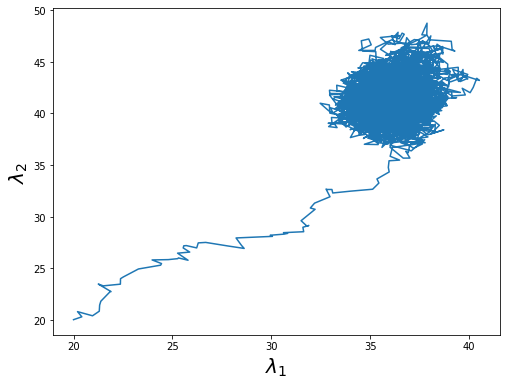

In [17]:
#lets plot the values as used in the course discussions
plt.plot(D.T[0],D.T[1])
plt.xlabel("$\lambda_1$",fontsize=20)
plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)

plt.show()

In [24]:
print('mean(λ1 is)',np.mean(D.T[0][100:]))
print('std(λ1 is)',np.std(D.T[0][100:]))
print('mean(λ2 is)',np.mean(D.T[1][100:]))
print('std(λ2 is)',np.std(D.T[1][100:]))
print('mean(W_s is)',np.round(np.mean(D.T[2][100:])))

mean(λ1 is) 35.99148915223113
std(λ1 is) 1.2849677676613778
mean(λ2 is) 41.65742698080987
std(λ2 is) 2.116157291819227
mean(W_s is) 34.0


Below we got our parameters lambda1, lambda2 and Ws closer to the actual values and the graph converged faster

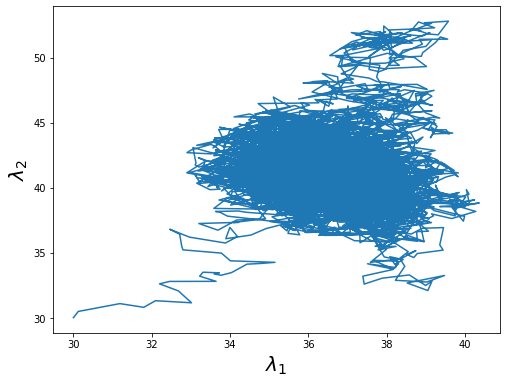

In [18]:

D=MCMC(log_posterior,data=[k,w],initial=[30,30,30],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=10000)
plt.plot(D.T[0],D.T[1])
plt.xlabel("$\lambda_1$",fontsize=20)
plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)
plt.show()

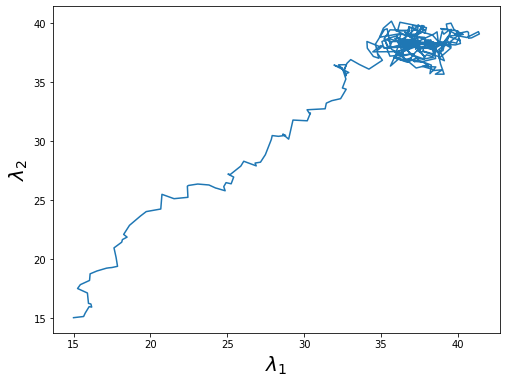

In [30]:
D=MCMC(log_posterior,data=[k,w],initial=[15,15,15],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=500)
plt.plot(D.T[0],D.T[1])
plt.xlabel("$\lambda_1$",fontsize=20)
plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)
plt.show()

In [31]:
print('mean(λ1 is)',np.mean(D.T[0][100:]))
print('std(λ1 is)',np.std(D.T[0][100:]))
print('mean(λ2 is)',np.mean(D.T[1][100:]))
print('std(λ2 is)',np.std(D.T[1][100:]))
print('mean(W_s is)',np.round(np.mean(D.T[2][100:])))

mean(λ1 is) 37.080548143878666
std(λ1 is) 2.0275673063792237
mean(λ2 is) 37.961112637114205
std(λ2 is) 1.3242595990949761
mean(W_s is) 12.0


### Changing the initial values or number of iterations does not impact the output unless we compensate by either an intelligent guess for initials or higher number of iterations. In the above example, we started with an initial which is way off the actual. If we increase the number of iterations to a very high number, we will achieve the same results. However, if we reduce the iterations, we will end up with a completely incorrect result as in the case above. 

### 2 a) Below is a python function which takes 2 inputs, a 2D dataset, which is generated in this case and number of clusters in euclidean space. Euclidean space means, if (x,y) is one point and (y,z) is another then (x,z) is possible and can typically be derived by taking the difference in value of all dimensions of x with corresponding dimensions of point z.

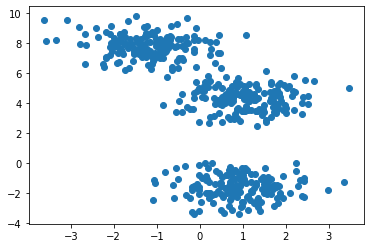

In [20]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)
import matplotlib.pylab as plt
#Taking feature x1 and x2
plt.scatter(X[:,0],X[:,1])
#plt.scatter(X[:,0],X[:,1],c=Y)

How K-Means works:
1. Starts with random k centroids in the cluster, 
2. For every datapoint in the cluster, which are all those 500 random points we have from the make_blobs above,
   K-means computes the euclidean distance between each point and each of the centroids. 
3. Once all the datapoints have been assigned to a centroid, we would have the datapoints split amoung the number of clusters we wanted to have. Lets say k. 
4. Now that we have k clusters, the centroids that we started out with, (could be real randomnly picked datapoint or a non-existant value) may not really be the center. So we calculate the mean of all the datapoints in given cluster and the mean point becomes the new centroid
5. Steps 1 - 4 repeat until the centroids in previous iteration match the centroids in current iteration. Once they match, it indicates the algorithm has converged. 


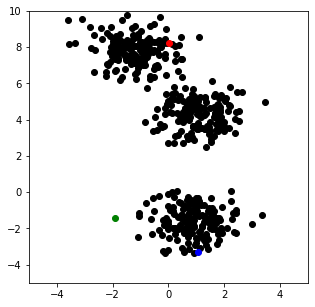

,x,y,z
0,0.029140,-2.541718,2.298101
1,-1.852313,8.584712,9.806390
2,0.963818,-0.708849,1.734641
3,-0.687670,8.488246,8.535578
4,1.867022,-2.120719,3.796720


In [39]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import pandas as pd

# From the above blob based dataset, lets randomly pick the clusters 
#based on k value. Starting with 3. We will experiment with it.
k=3
centroids ={
    i+1 :[np.random.choice(X[:,0]),np.random.choice(X[:,1])]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],color='k')
#The randomly picked centroids are assigned these colors
colmap={1:'r',2:'g',3:'b'}

#Selecting the x and y limit based on the data ranges above
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(-5,5)
plt.ylim(-5,10)
plt.show()
df = pd.DataFrame(X,columns=['x','y','z'])
df.head()

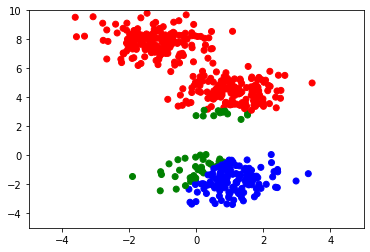

In [43]:
#Assigning the points to the clusters
#Pass Dataframes and 
def assignment (p, centroids):
    for i in centroids.keys():
        #for p in points:
            p['distance_from_{}'.format(i)]=(
            np.sqrt(
                (p['x']-centroids[i][0])**2+(p['y']-centroids[i][1])**2
                 )
            )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    p['closest'] = p.loc[:,centroid_distance_cols].idxmin(axis=1)
    p['closest'] = p['closest'].map(lambda x:int(x.lstrip('distance_from_')))
    p['color'] = p['closest'].map(lambda x:colmap[x])
    return p


df=assignment (df, centroids)
df.head()

##At the end of first assignment this is how the cluster partitioning looks
plt.scatter(df['x'],df['y'],color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(-5,5)
plt.ylim(-5,10)
plt.show()    

new centroids {1: [-0.09937384142148413, 6.163858332047451], 2: [0.16417849788179517, 0.12532611772040664], 3: [1.1244222725639945, -1.7486892625196842]}


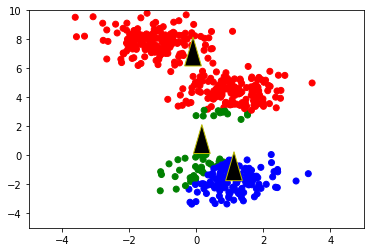

In [60]:
import copy
import matplotlib.axes as ax
old_centroids=copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        #Change the ith centroid to the mean of the previously partitioned ith centroid
        centroids[i][0]=np.mean(df[df['closest'] == i]['x'])
        centroids[i][1]=np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print("new centroids",centroids)    
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'])
plt.xlim(-5,5)
plt.ylim(-5,10)
for i in centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx=(centroids[i][0] - old_centroids[i][0])
    dy = (centroids[i][1] - old_centroids[i][1])
    ax.arrow(old_x,old_y,dx,dy,head_width=0.5, head_length = 2, fc='black',ec='y')
plt.show()

### 2b) Using scikit k-means to determine optimal number of clusters
The arrows show the shift in position of the centroids based on mean computed. With every iteration this repeats until the centroids do not change anymore. 

Took 1 iterations 


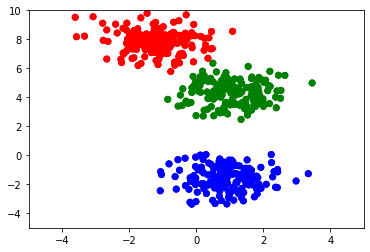

In [65]:
iterations=0
while True:
    iterations=iterations+1
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df=assignment(df,centroids)
    plt.scatter(df['x'],df['y'],color=df['color'])   
    if closest_centroids.equals(df['closest']):
        break

print("Took {} iterations ".format(iterations))        
plt.scatter(df['x'],df['y'],color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(-5,5)
plt.ylim(-5,10)
plt.show()            

### 2c)
####) Hierarchial clustering which goes top down by splitting on distance or bottoms up by adding closer points is one of the methods to determine underlying clusters in the data. However it is not an optimal solution. 


Now to determine the value that needs to be passed as k, we can use elbow method:
It is the tipping point in the graph below when the sum of squared errors or inertia, which basically represents the variance within clusters, drops suddenly and takes a linear turn. This means the datapoints are closely associated and all the clusters are as dense as possible with the given dataset.
That point shows the optimal value which turns out to be 3 with this dataset.


In [42]:
print(len(X[:,2])

500


### 2d) Below we use elbow method to determine the optimal 

In [17]:
from sklearn.cluster import KMeans

# function returns WSS (within sum of squares) score for k values from 1 to kmax
def compute_cluster_variance(points, kmax):
    sse = {}
    for k in range(1, kmax+1):
        #create a Kmeans model and fit the given datapoints to it.
        kmeans = KMeans(n_clusters = k).fit(points)
        #km = kmeans(points, k=10)
        #Find the actual centroids from the dataset
        centroids = kmeans.cluster_centers_
        #pred_clusters = kmeans.predict(points)
        #Inertia is a measure of variability within the clusters. 
        sse[k]=kmeans.inertia_
#        curr_sse = 0
#         # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
#         for i in range(len(points)):
#             curr_center = centroids[pred_clusters[i]]
#             curr_sse += ((points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2)
#             sse[k]=curr_sse
    return sse

In [18]:
results = compute_cluster_variance(X,10)

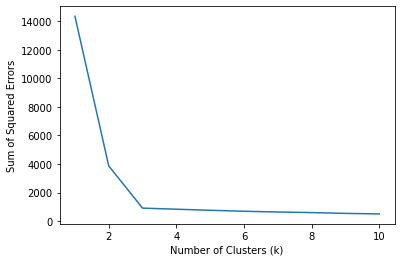

In [20]:
plt.figure()
plt.plot(list(results.keys()), list(results.values()))
plt.ylabel("Sum of Squared Errors")
plt.xlabel("Number of Clusters (k)")
plt.show()

References:
1. Book - K-means and hierarchial clustering with Python by Joel Grus
2. https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
3. https://github.com/analyticalmonk/KMeans_elbow
4. https://blog.easysol.net/machine-learning-algorithms-3/
5. https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0
6. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
7. https://www.youtube.com/watch?v=1XqG0kaJVHY    
